THE DIET PROBLEM

In [2]:
# import pulp
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

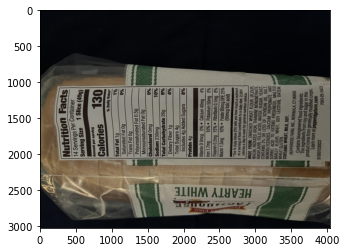

In [3]:
# food item documentation - pepperidge farm hearty white bread
# price calculation for serving size: lowest price $3.84 (walmart); serving size 1 slice; 14 servings per container
# 3.84/14 = $0.27 per serving

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Users/shaner/Downloads/white_bread.JPG')
imgplot = plt.imshow(img)
plt.show()

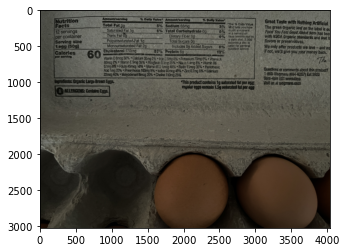

In [4]:
# food item documentation - wegmans organic cage free large brown eggs
# price calculation for serving size: price $4.79; serving size 1 egg; 12 servings per containter
# 4.79/12 = $0.40 per serving

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Users/shaner/Downloads/brown_eggs.jpg')
imgplot = plt.imshow(img)
plt.show()

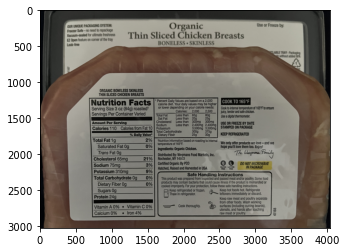

In [5]:
# food item documentation - organic thin sliced chicken breasts
# price calculation for serving size: price $9.49; serving size 3oz.; 5.33 servings per container
# 9.49/5.33 = &1.78 per sesrving
# iron labels as 4% daily value; eggs labels as the same 4% and lists amount as 0.9mg, so will use 0.9mg for chicken as well

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Users/shaner/Downloads/sliced_chicken.jpg')
imgplot = plt.imshow(img)
plt.show()

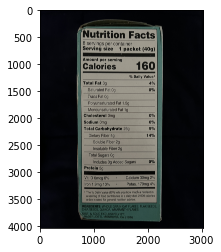

In [6]:
# food item documentation - trader joes gluten free instant oatmeal
# price calculation for serving size: price $18.55 for two-pack, adjusted to $9.275 for single pack; serving size 1 packet; 8 servings per container
# $9.275/8 = $1.15 per serving

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Users/shaner/Downloads/instant_oatmeal.jpg')
imgplot = plt.imshow(img)
plt.show()

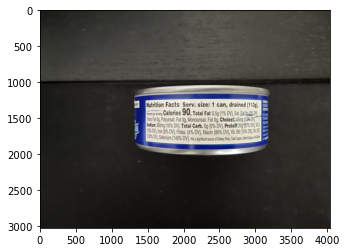

In [7]:
# food item documentation - starkist chunk light canned tuna in water
# price calculation for serving size: lowest price $1.14 (walmart); serving size 1 can
# $1.14/1 = $1.14 per serving
# vitamin d labels as 10% daily value; daily value is 15mcg; will use 1.5mcg per serving
# iron labels as 8%, will use 1.8mg, as amount given eggs listed 4% and 0.9mg
# potassium labels as 4%, will use 170mg, as oatmal also labeled as 4% and listed 170mg

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/Users/shaner/Downloads/canned_tuna.jpg')
imgplot = plt.imshow(img)
plt.show()

In [8]:
# define the problem

model = LpProblem('The_Diet_Problem', LpMinimize)

In [9]:
# decision variables

bread = LpVariable('bread', 0, None)
eggs = LpVariable('eggs', 0, None)
chicken = LpVariable('chicken', 0, None)
oatmeal = LpVariable('oatmeal', 0, None)
tuna = LpVariable('tuna', 0, None)

In [10]:
# objective function

model += 0.27*bread + 0.40*eggs + 1.78*chicken + 1.15*oatmeal + 1.14*tuna

In [11]:
# nutritional constraints

model += bread*130 + eggs*60 + chicken*110 + oatmeal*160 + tuna*90 >= 2000
model += bread*230 + eggs*65 + chicken*75 + oatmeal*0 + tuna*360 <= 5000
model += bread*4 + eggs*6 + chicken*24 + oatmeal*5 + tuna*20 >= 50
model += bread*0 + eggs*6 + chicken*0 + oatmeal*0 + tuna*1.5 >= 20
model += bread*40 + eggs*30 + chicken*0 + oatmeal*30 + tuna*0 >= 1300
model += bread*1.7 + eggs*0.9 + chicken*.09 + oatmeal*1.9 + tuna*1.8 >= 18
model += bread*50 + eggs*70 + chicken*310 + oatmeal*170 + tuna*170 >= 4700

In [13]:
# solve the problem

status = model.solve()
print(f'The Diet Problem')
print(f'status={LpStatus[status]}')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/6cpyckrd2g3_n4__lzwhw92w0000gn/T/bdf66203b7c845639a1a19b640c7c90c-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/ll/6cpyckrd2g3_n4__lzwhw92w0000gn/T/bdf66203b7c845639a1a19b640c7c90c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 47 RHS
At line 55 BOUNDS
At line 56 ENDATA
Problem MODEL has 7 rows, 5 columns and 29 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 7 (0) rows, 5 (0) columns and 29 (0) elements
0  Obj 0 Primal inf 75.051641 (6)
4  Obj 26.735232
Optimal - objective value 26.735232
Optimal objective 26.73523244 - 4 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

The Die

In [14]:
# output optimized values for each food item

for v in model.variables():
    print(v.name, "=", v.varValue)

bread = 11.572877
chicken = 6.994058
eggs = 27.902831
oatmeal = 0.0
tuna = 0.0


THE DIET PROBLEM, MINUS CHICKEN

In [15]:
# define the problem

model = LpProblem('The_Diet_Problem', LpMinimize)

In [16]:
# decision variables

bread = LpVariable('bread', 0, None)
eggs = LpVariable('eggs', 0, None)
oatmeal = LpVariable('oatmeal', 0, None)
tuna = LpVariable('tuna', 0, None)

In [17]:
# objective function

model += 0.27*bread + 0.40*eggs + 1.15*oatmeal + 1.14*tuna

In [18]:
# nutritional constraints

model += bread*130 + eggs*60 + oatmeal*160 + tuna*90 >= 2000
model += bread*230 + eggs*65 + oatmeal*0 + tuna*360 <= 5000
model += bread*4 + eggs*6 + oatmeal*5 + tuna*20 >= 50
model += bread*0 + eggs*6 + oatmeal*0 + tuna*1.5 >= 20
model += bread*40 + eggs*30 + oatmeal*30 + tuna*0 >= 1300
model += bread*1.7 + eggs*0.9 + oatmeal*1.9 + tuna*1.8 >= 18
model += bread*50 + eggs*70 + oatmeal*170 + tuna*170 >= 4700

In [19]:
# solve the problem

status = model.solve()
print(f'The Diet Problem')
print(f'status={LpStatus[status]}')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/ll/6cpyckrd2g3_n4__lzwhw92w0000gn/T/b967f5888dd74451b56166ec4f8c53b1-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/ll/6cpyckrd2g3_n4__lzwhw92w0000gn/T/b967f5888dd74451b56166ec4f8c53b1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 41 RHS
At line 49 BOUNDS
At line 50 ENDATA
Problem MODEL has 7 rows, 4 columns and 24 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 7 (0) rows, 4 (0) columns and 24 (0) elements
0  Obj 0 Primal inf 87.954076 (6)
3  Obj 26.802724
Optimal - objective value 26.802724
Optimal objective 26.80272374 - 3 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

The Die

In [20]:
# output optimized values for each food item

for v in model.variables():
    print(v.name, "=", v.varValue)

bread = 3.463035
eggs = 64.669261
oatmeal = 0.0
tuna = 0.0
